In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df = pd.read_csv('magic04.data.csv', names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
df['class'].unique()

array(['g', 'h'], dtype=object)

In [4]:
df['class'] = (df['class'] == 'g').astype(int)

In [5]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


# Train, Validation, Test Data Sets

In [6]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [7]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe.drop(columns= 'class').values
    y = dataframe['class'].values
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    
    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)

    data = np.hstack((X, np.reshape(y, (len(y), 1))))
    
    return data, X, y

In [8]:
print(len(train[train['class'] == 1])) # gamma
print(len(train[train['class'] == 0]))
# you will notice that there is no balance between the two types of that class (the zeros and ones in your class)
# which will not properly train your model.
# this is why you import (from imblearn.over_sampling import RandomOverSampler)

7434
3978


In [9]:
train, x_train, y_train = scale_dataset(train, oversample=True)
valid, x_valid, y_valid = scale_dataset(valid)
test, x_test, y_test = scale_dataset(test)

# KNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [11]:
knn = KNeighborsClassifier()

In [12]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [13]:
y_hat = knn.predict(x_test)

In [14]:
mse = sum((y_hat - y_test)**2)/len(y_test)
mse

0.17560462670872765

In [15]:
print(classification_report(y_hat, y_test))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75      1302
           1       0.87      0.86      0.87      2502

    accuracy                           0.82      3804
   macro avg       0.80      0.81      0.81      3804
weighted avg       0.83      0.82      0.83      3804



# Naive Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB

In [17]:
NB_model = GaussianNB()
NB_model.fit(x_train, y_train)

GaussianNB()

In [18]:
y_hat = NB_model.predict(x_test)
mse = sum((y_hat - y_test)**2)/len(y_test)
mse

0.2797055730809674

In [19]:
print(classification_report(y_hat, y_test))

              precision    recall  f1-score   support

           0       0.40      0.68      0.51       802
           1       0.89      0.73      0.81      3002

    accuracy                           0.72      3804
   macro avg       0.65      0.70      0.66      3804
weighted avg       0.79      0.72      0.74      3804



### This is worse than KNN, at least for this case

# Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
log_model = LogisticRegression()
log_model.fit(x_train, y_train)

LogisticRegression()

In [22]:
y_hat = log_model.predict(x_test)
mse = sum((y_hat - y_test)**2)/len(y_test)
mse

0.2024185068349106

In [23]:
print(classification_report(y_hat, y_test))

              precision    recall  f1-score   support

           0       0.74      0.70      0.72      1410
           1       0.83      0.85      0.84      2394

    accuracy                           0.80      3804
   macro avg       0.78      0.78      0.78      3804
weighted avg       0.80      0.80      0.80      3804



### SVM is not robust in case of having outliers, because it's going to affect the process of choosing the separation region of your data.
### So, it may not be the best choice in some cases.

<img src="SVM.png" style="width:700px; height:900">

<img src="Kernel.png" style="width:700px; height:900">

In [24]:
from sklearn.svm import SVC

In [25]:
svm_model = SVC()
svm_model.fit(x_train, y_train)

SVC()

In [26]:
y_hat = svm_model.predict(x_test)
mse = sum((y_hat - y_test)**2)/len(y_test)
mse

0.1353838065194532

In [27]:
print(classification_report(y_hat, y_test))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81      1295
           1       0.91      0.89      0.90      2509

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.87      0.86      0.87      3804



### till now, SVM is the best of them all.

# Neural Networks

In [28]:
import tensorflow as tf

In [29]:
"""
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
  ax1.plot(history.history['loss'], label= 'loss')
  ax1.plot(history.history['val_loss'], label= 'val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label= 'accuracy')
  ax2.plot(history.history['val_accuracy'], label= 'val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()
"""

"\ndef plot_history(history):\n  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))\n  ax1.plot(history.history['loss'], label= 'loss')\n  ax1.plot(history.history['val_loss'], label= 'val_loss')\n  ax1.set_xlabel('Epoch')\n  ax1.set_ylabel('Binary crossentropy')\n  ax1.grid(True)\n\n  ax2.plot(history.history['accuracy'], label= 'accuracy')\n  ax2.plot(history.history['val_accuracy'], label= 'val_accuracy')\n  ax2.set_xlabel('Epoch')\n  ax2.set_ylabel('Accuracy')\n  ax2.grid(True)\n\n  plt.show()\n"

In [30]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
  ax1.plot(history.history['loss'])
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'])
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [31]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation = 'tanh', input_shape=(10,)),
    tf.keras.layers.Dense(32, activation= 'tanh'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

In [32]:
nn_model.compile(optimizer= tf.keras.optimizers.Adam(0.001), loss= 'binary_crossentropy', metrics= ['accuracy'])

In [33]:
history = nn_model.fit(
    x_train, y_train, epochs= 100,
    verbose= 0, batch_size= 32, validation_split= 0.2
)

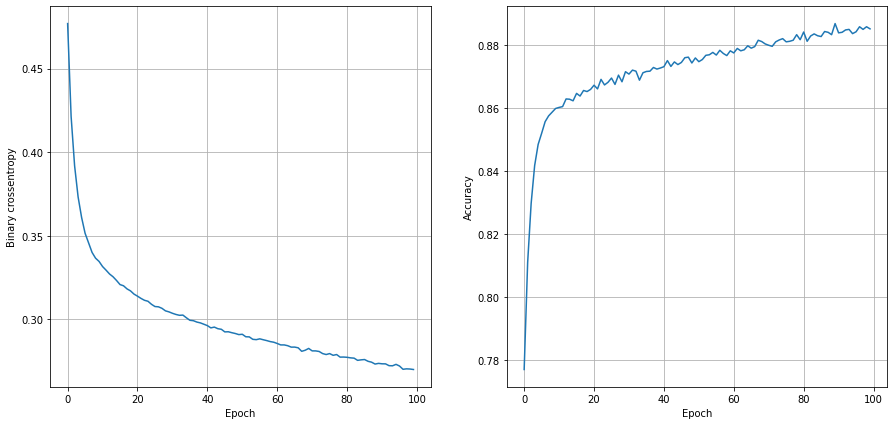

In [34]:
plot_history(history)